In [24]:
# -*- encoding:utf-8 -*-
import json
import codecs
import sys
import PIL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from configparser import ConfigParser
import sys
import cv2
import os
%matplotlib inline
from pylab import *  
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
zhfont1 = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/cjkunifonts-ukai/ukai.ttc')
#有中文出现的情况，需要u'内容'
reload(sys)
sys.setdefaultencoding('utf-8')

path = r'F:\code\xiaoqu\xiaoqu\analysis\bargain.csv'
filepath = r'F:\code\xiaoqu\xiaoqu\analysis\img.jpg'

In [25]:
house = pd.read_csv(filepath_or_buffer = path,
                        encoding = 'utf8',
                        engine='python',
                        index_col = 0
                   )

In [26]:
def spTitle(item):
    fix = item.split(u'第')[0]
    return fix
def spArea(item):
    fix = item.split(u'二手')[0]
    return fix
def transDealData(item):
    return str(item)

#数据清理，将area跟title字段截取想要的部份
house['title'] = house['title'].apply(spTitle)
house['area'] = house['area'].apply(spArea)
house['dealDate'] = house['dealDate'].apply(transDealData)

In [88]:
pivoTable = pd.pivot_table(house,index=[u"area"],values=[u'dealPrice'],aggfunc=u'count',fill_value=0,)

In [94]:
house[house['area'] == u'天河,白云']
list = ['南沙','增城','萝岗','天河','白云','越秀','海珠','番禺','荔湾','花都','黄埔']
dict = {}
for item in pivoTable.index:
    for team in item.split(','):
        if team not in dict:
            dict[team] = pivoTable.ix[item]
        else:
            dict[team] += pivoTable.ix[item]
result = pd.DataFrame(dict)

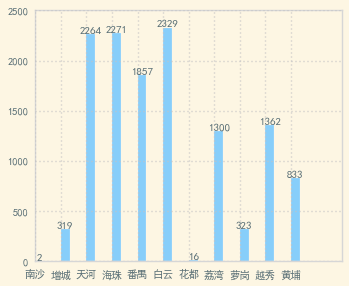

In [74]:
jtplot.style('solarized-light')
X = result.columns
Y = result.ix[u'dealPrice']
rects = plt.bar(range(len(X)), Y,tick_label=X,width = 0.35,facecolor = 'lightskyblue',edgecolor = 'white')
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2 , height, '%d' % height, ha='center', va='bottom')
        # 柱形图边缘用白色填充，纯粹为了美观
        rect.set_edgecolor('white')
add_labels(rects)

In [57]:
result

,南沙,增城,天河,海珠,番禺,白云,花都,荔湾,萝岗,越秀,黄埔
dealPrice,2,319,2264,2271,1857,2329,16,1300,323,1362,833


In [99]:
huanan = house[house['houseName'].str.contains(u'万松') & house['houseType'].str.contains(u'3室2厅')]

In [97]:
huanan

,area,title,houseName,houseType,dealPrice,houseSize,dealDate,unitPrice,direction,elevator,decoration,floor,bulidDate,dealCycle,originalPrice
id,,,,,,,,,,,,,,,


In [31]:
want = huanan.reindex(columns=['dealPrice','dealDate'])
price = want['dealPrice']
data = pd.to_datetime(want['dealDate'],format='%Y.%m.%d')

TypeError: 'list' object is not callable

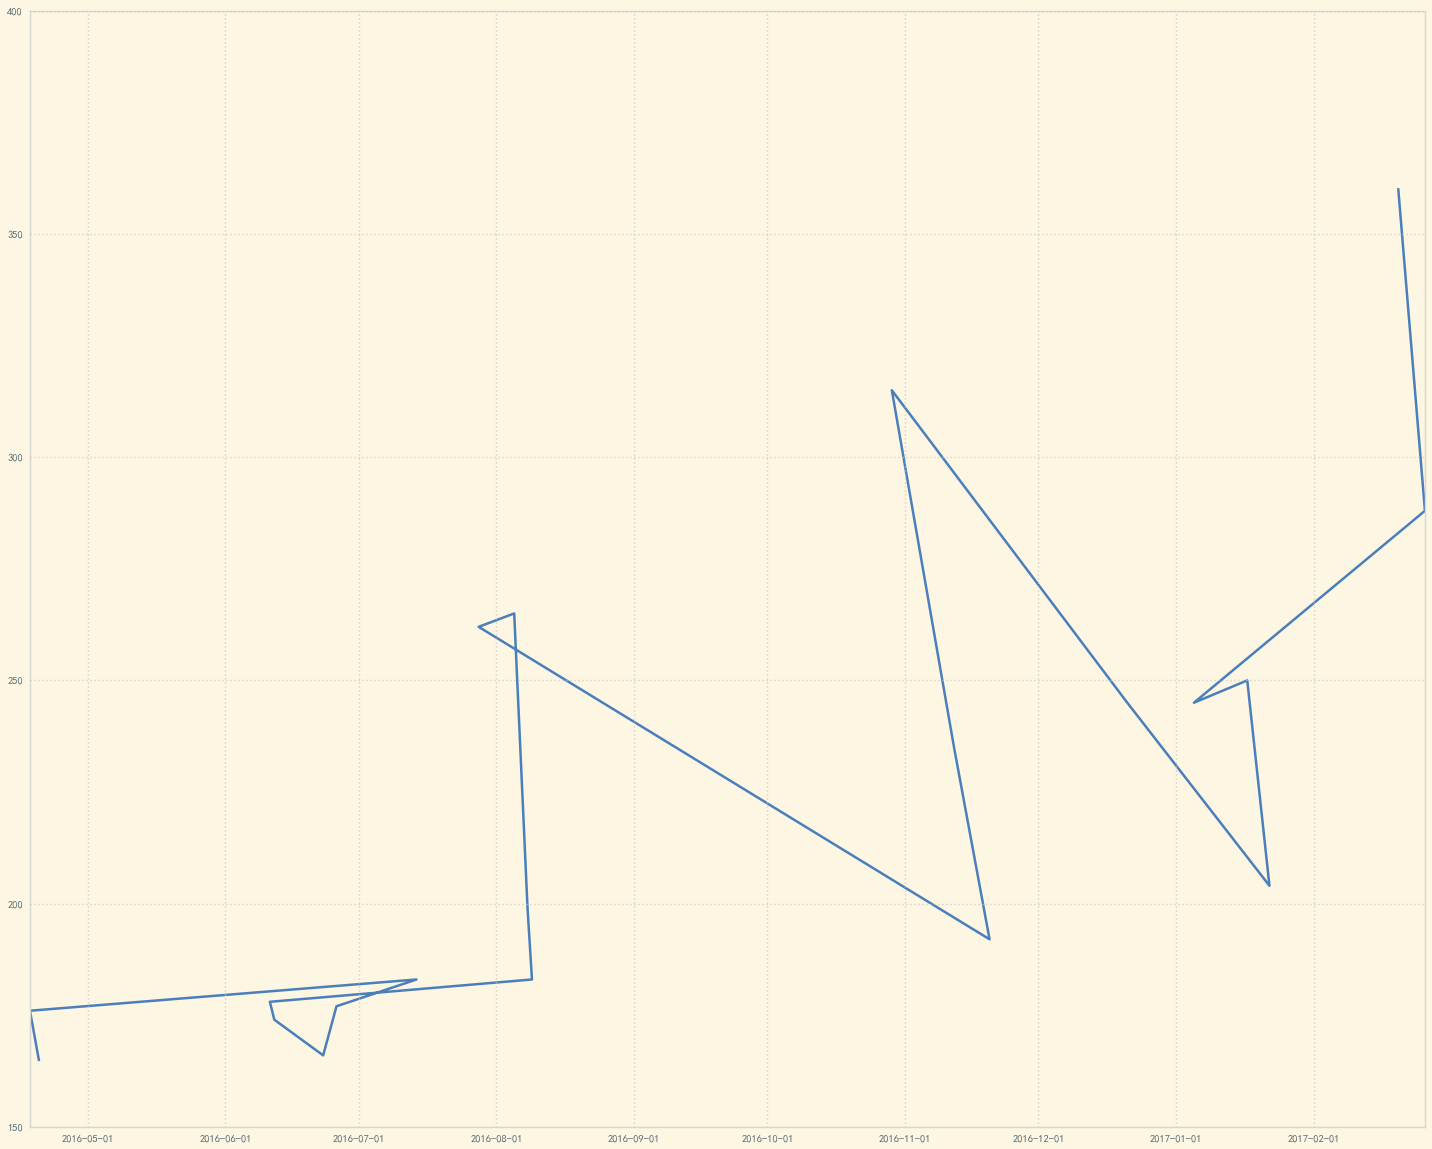

In [42]:
import matplotlib.dates as mdate
fig=plt.figure(figsize=(25,20))
ax1 = fig.add_subplot(111)
ax1.plot(data,price,color='#4A7FBB',linewidth=2.5, linestyle="-",)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式
plt.xticks(list(data))